# Digits Dataset Classification

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## Loading the dataset

In [3]:
X, y = load_digits(return_X_y=True)

print(f"X {X.shape}")
print(f"y {y.shape}")

X (1797, 64)
y (1797,)


## Distribution of labels

In [18]:
num_of_unique_labels = pd.Series(y).nunique()
print(f"Number of unique labels: {num_of_unique_labels}")
print(pd.Series(y).value_counts().sort_index())

Number of unique labels: 10
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


## Plotting 25 samples of dataset

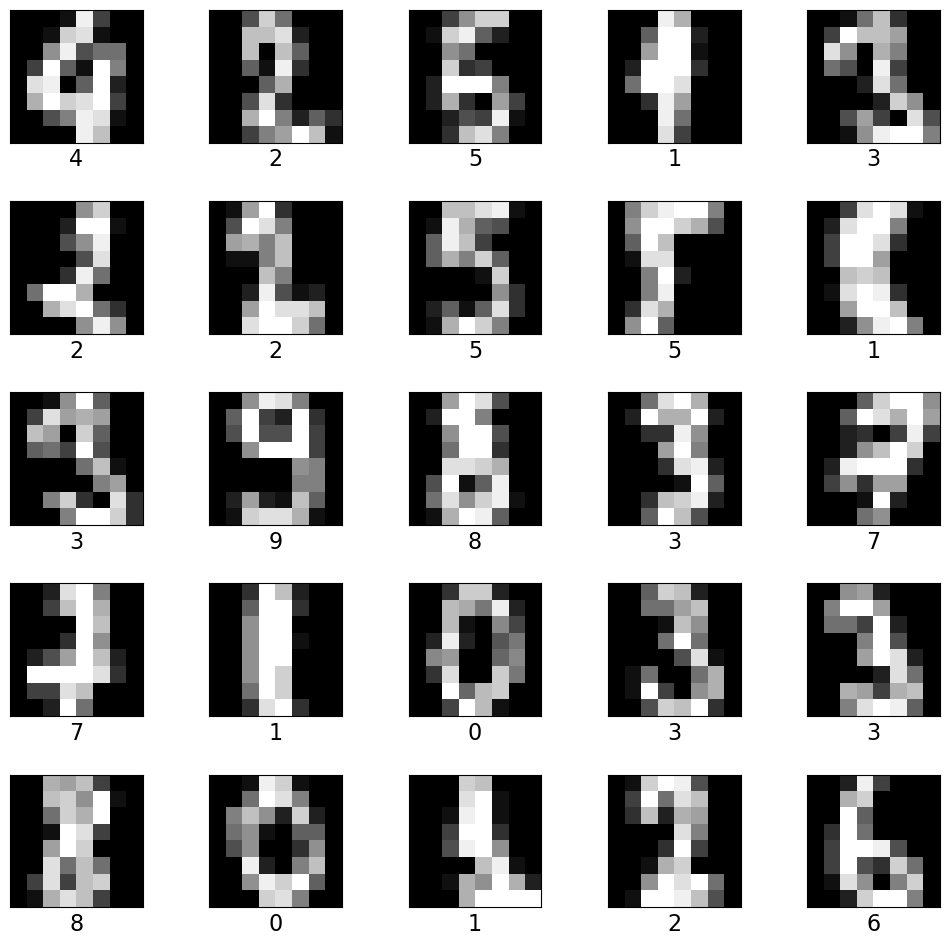

In [34]:
np.random.seed(101)
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.5)
n = 0
for i in np.random.randint(0, len(X), size=25):
    n += 1
    plt.subplot(5, 5, n)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8, 8), cmap="gray")
    plt.xlabel(y[i], fontsize=16)

plt.show()

## Splitting the dataset to training set and testing set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (1347, 64)
X_test (450, 64)
y_train (1347,)
y_test (450,)


## Create the classification model

In [44]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(solver="liblinear")
lg_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Predicting the test dataset

In [45]:
y_pred = lg_clf.predict(X_test)

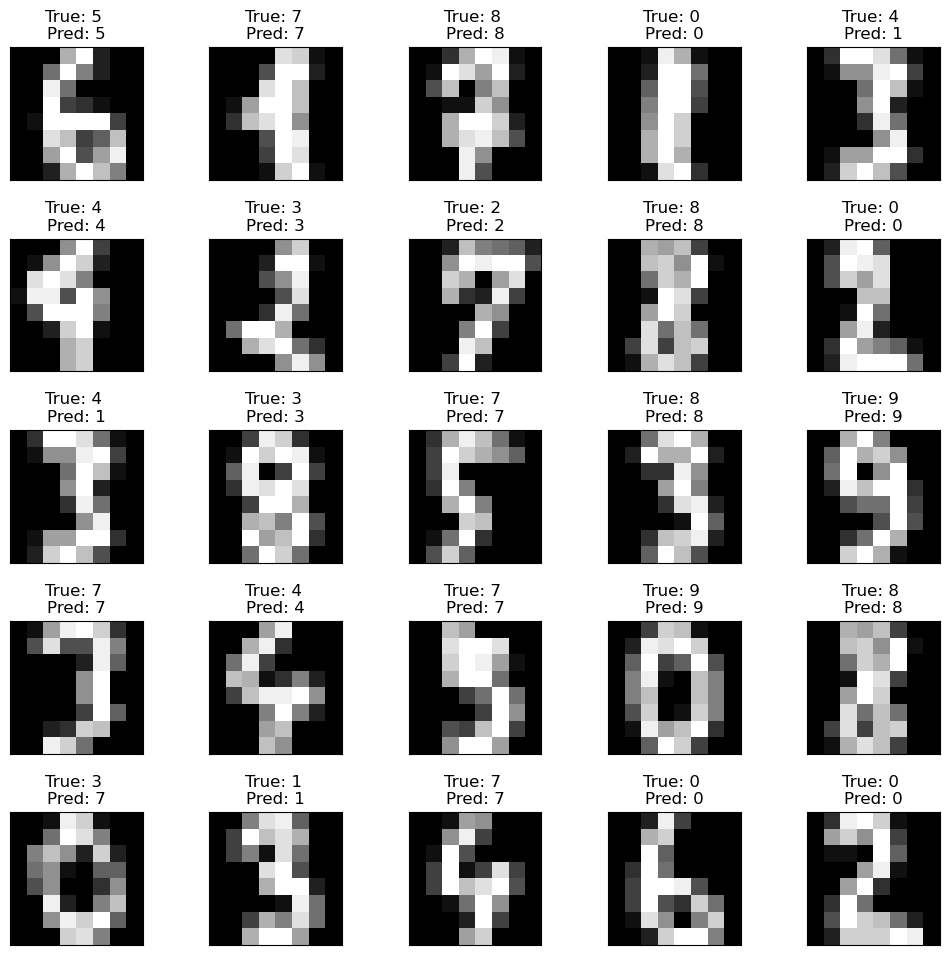

In [50]:
np.random.seed(101)
plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.5)
n = 0
for i in np.random.randint(0, len(X_test), size=25):
    n += 1
    plt.subplot(5, 5, n)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8, 8), cmap="gray")
    plt.title(f"True: {y_test[i]} \nPred: {y_pred[i]}")

plt.show()

## Evaluating the model


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.92      0.90      0.91        50
           2       1.00      1.00      1.00        47
           3       0.95      0.88      0.91        48
           4       1.00      0.90      0.95        40
           5       0.95      1.00      0.97        52
           6       1.00      0.98      0.99        43
           7       0.92      0.98      0.95        49
           8       0.81      0.95      0.87        40
           9       0.94      0.87      0.91        39

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



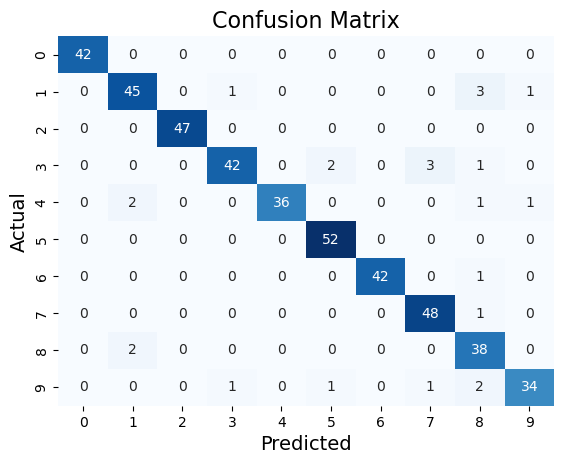

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);